**Content**:
- Problem Definition
- Objective
- Data Preparation
- Data Cleaning
- EDA
- Data Preprocessing
- Modeling
- Insight and Recommendation

# **Problem Definition**

Home Credit currently uses various statistical methods and Machine Learning to make credit score predictions. Home Credit wants to **evaluate the data using machine learning** to ensure that customers who are able to make payments are not turned down when applying for a loan, and that loans can be granted with a principal, maturity, and payment calendar that will motivate customers to succeed.

*Note* : use at least **2 Machine Learning models** where one of them is **Logistic Regression**

# **Objective**

Create a machine learning model that can **predict whether a credit application should be accepted or not** so that it can serve as a guide when evaluating applications.

# **Data Preparation**

First, we need to import the libraries that will be used. Import pandas and numpy for data processing, matplotlib for graphical presentation, and seaborn for advanced graphic. For modelling, we need to import sklearn.

## **Import Libraries**

In [1]:
# for basic data processing and graphical presentation
import pandas as pd
import numpy as np

import sklearn
import seaborn as sns
import matplotlib.pyplot as plt

# for time series data processing
from datetime import datetime, timedelta

#for modelling
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from imblearn.pipeline import make_pipeline as imbl_pipe
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import *

# for import files
from google.colab import files
import io

# for ignore warnings
import warnings
warnings.filterwarnings('ignore')

## **Dataset**

Let's import all datasets and have a look.

In [2]:
# Read csv file
app_train= pd.read_csv('application_train.csv')
app_test= pd.read_csv('application_test.csv')

pd.set_option('display.max.columns',None)   

In [3]:
app_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


The **app_train** dataset consists of **307.511 rows** and **122 columns**

In [4]:
app_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48744 entries, 0 to 48743
Columns: 121 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(40), object(16)
memory usage: 45.0+ MB


The **app_test** dataset consists of **48.744 rows** and **121 columns**

# **Data Cleaning**

to perform modeling analysis using machine learning, I decided to use app_train dataset

In [5]:
#Check data app_train
app_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

**Check missing values**

In [6]:
app_train.isnull().sum()

SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
                              ...  
AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_WEEK    41519
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_QRT     41519
AMT_REQ_CREDIT_BUREAU_YEAR    41519
Length: 122, dtype: int64

In [7]:
#Drop missing values (has >50% missing values)
app_train.drop(app_train.iloc[:, 44:95], inplace=True, axis=1)
app_train.drop(['OWN_CAR_AGE','EXT_SOURCE_1','EXT_SOURCE_2','EXT_SOURCE_3'], inplace=True, axis=1)
app_train.isnull().sum()

SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
                              ...  
AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_WEEK    41519
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_QRT     41519
AMT_REQ_CREDIT_BUREAU_YEAR    41519
Length: 67, dtype: int64

In [8]:
app_train.dropna(inplace=True)

In [9]:
app_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 181986 entries, 0 to 307510
Data columns (total 67 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   181986 non-null  int64  
 1   TARGET                       181986 non-null  int64  
 2   NAME_CONTRACT_TYPE           181986 non-null  object 
 3   CODE_GENDER                  181986 non-null  object 
 4   FLAG_OWN_CAR                 181986 non-null  object 
 5   FLAG_OWN_REALTY              181986 non-null  object 
 6   CNT_CHILDREN                 181986 non-null  int64  
 7   AMT_INCOME_TOTAL             181986 non-null  float64
 8   AMT_CREDIT                   181986 non-null  float64
 9   AMT_ANNUITY                  181986 non-null  float64
 10  AMT_GOODS_PRICE              181986 non-null  float64
 11  NAME_TYPE_SUITE              181986 non-null  object 
 12  NAME_INCOME_TYPE             181986 non-null  object 
 13 

In [10]:
#Drop column that contains all zero values
app_train = app_train.loc[:, (app_train != 0).any(axis=0)]
app_train

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,-1134.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,-828.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,-1106.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
5,100008,0,Cash loans,M,N,Y,0,99000.0,490495.5,27517.5,454500.0,"Spouse, partner",State servant,Secondary / secondary special,Married,House / apartment,0.035792,-16941,-1588,-4970.0,-477,1,1,1,1,1,0,Laborers,2.0,2,2,WEDNESDAY,16,0,0,0,0,0,0,Other,-2536.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307502,456246,0,Cash loans,F,N,Y,1,94500.0,225000.0,10620.0,225000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.010966,-16063,-8736,-8672.0,-4531,1,1,1,1,0,0,Laborers,3.0,2,2,MONDAY,16,0,0,0,0,1,1,School,-1516.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
307503,456247,0,Cash loans,F,N,Y,0,112500.0,345510.0,17770.5,247500.0,Unaccompanied,Commercial associate,Higher education,Single / not married,House / apartment,0.022800,-11870,-399,-675.0,-3936,1,1,0,1,0,1,Core staff,1.0,2,2,SATURDAY,11,0,0,0,0,0,0,Bank,-2315.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,1.0,0.0,2.0
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,585000.0,Unaccompanied,Working,Higher education,Separated,House / apartment,0.005002,-14966,-7921,-6737.0,-5150,1,1,0,1,0,1,Managers,1.0,3,3,THURSDAY,9,0,0,0,0,1,1,School,-1909.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,0.0,0.0,1.

**Calculate the user's age when registering**

In [11]:
#Get age now and age at registration per user
now = datetime.today()

app_train['DAYS_BIRTH'] = pd.to_timedelta(app_train['DAYS_BIRTH'], unit='D')
app_train['DAYS_REGISTRATION'] = pd.to_timedelta(app_train['DAYS_REGISTRATION'], unit='D')

app_train['BIRTH_DATE'] = pd.to_datetime('today') + app_train['DAYS_BIRTH']
app_train['REGIS_DATE'] = pd.to_datetime('today') + app_train['DAYS_REGISTRATION']

app_train['AGE_REGIS'] = (app_train['REGIS_DATE'] - app_train['BIRTH_DATE']).dt.days // 365
app_train['AGE'] = (now - app_train['BIRTH_DATE']).dt.days // 365

app_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,BIRTH_DATE,REGIS_DATE,AGE_REGIS,AGE
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461 days,-637,-3648 days,-2120,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,-1134.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,1997-07-09 16:16:32.275065,2013-06-08 16:16:32.278381,15,25
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765 days,-1188,-1186 days,-291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,-828.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,1977-07-10 16:16:32.275065,2020-03-05 16:16:32.278381,42,45
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046 days,-225,-4260 days,-2531,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,1971-04-12 16:16:32.275065,2011-10-05 16:16:32.278381,40,52
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932 days,-3038,-4311 days,-3458,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,-1106.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,1968-11-07 16:16:32.275065,2011-08-15 16:16:32.278381,42,54
5,100008,0,Cash loans,M,N,Y,0,99000.0,490495.5,27517.5,454500.0,"Spouse, partner",State servant,Secondary / secondary special,Married,House / apartment,0.035792,-16941 days,-1588,-4970 days,-477,1,1,1,1,1,0,Laborers,2.0,2,2,WEDNESDAY,16,0,0,0,0,0,0,Other,-2536.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0,1.0,1977-01-15 16:16:32.275065,2009-10-25 16:16:32.278381,32,46


**Check duplicate data**

In [12]:
app_train[app_train.duplicated()]

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,BIRTH_DATE,REGIS_DATE,AGE_REGIS,AGE


There is **no duplicate data**

## **Dataset Overview**

In [13]:
app_train = app_train.drop(app_train[app_train['CODE_GENDER'] == 'XNA'].index)

**Number of Debtors Based on Their Repayment Abilities**

In [14]:
# The Number of Customers Based on Their Repayment Abilities
decode_map = {0: "No Payment Difficulties", 1: "Payment Difficulties"}
def decode_sentiment(label):
    return decode_map[int(label)]

app_train['TARGET'] = app_train['TARGET'].apply(lambda x: decode_sentiment(x))

In [15]:
target = app_train.TARGET.value_counts(normalize=True)*100
target.reset_index()

,index,TARGET
0,No Payment Difficulties,91.586074
1,Payment Difficulties,8.413926


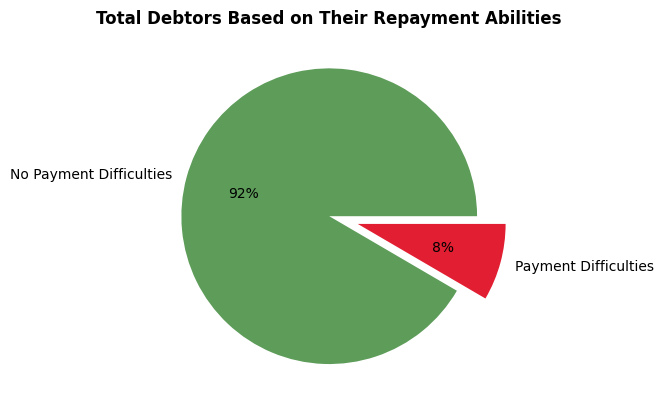

In [16]:
#Visualize TARGET proportions
import matplotlib.pyplot as plt

label = ('No Payment Difficulties', 'Payment Difficulties')
color = ('#5D9C59','#E21E32')
explode = (0, 0.2)

plt.title('Total Debtors Based on Their Repayment Abilities', fontweight='bold', fontsize=12)
plt.pie(target, labels=label, autopct='%1.0f%%', colors=color, explode=explode)
plt.show()

- **Target 0** means client **has no payment difficulties**
- **Target 1** means client with **payment difficulties**

**Number of Debtors Ability to Pay per Gender**

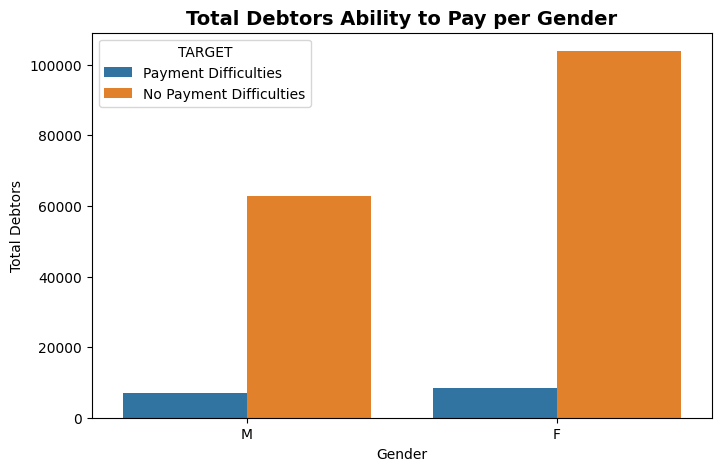

In [17]:
plt.figure(figsize = (8,5))
sns.countplot(x = 'CODE_GENDER', data = app_train, hue = 'TARGET')
plt.title('Total Debtors Ability to Pay per Gender', fontweight='bold', fontsize=14)
plt.xlabel('Gender')
plt.ylabel('Total Debtors')
plt.legend(frameon=True, loc='upper left', title='TARGET')
plt.show()

In [18]:
# Total Debtors Ability to Pay per Gender
cg = app_train.groupby(by=['CODE_GENDER','TARGET'], as_index=False)['SK_ID_CURR'].count()
cg.rename(columns={'SK_ID_CURR': 'TOTAL DEBTOR'}, inplace=True)
cg

,CODE_GENDER,TARGET,TOTAL DEBTOR
0,F,No Payment Difficulties,103894
1,F,Payment Difficulties,8340
2,M,No Payment Difficulties,62778
3,M,Payment Difficulties,6972


**Number of Debtors Ability to Pay per Contract Type**

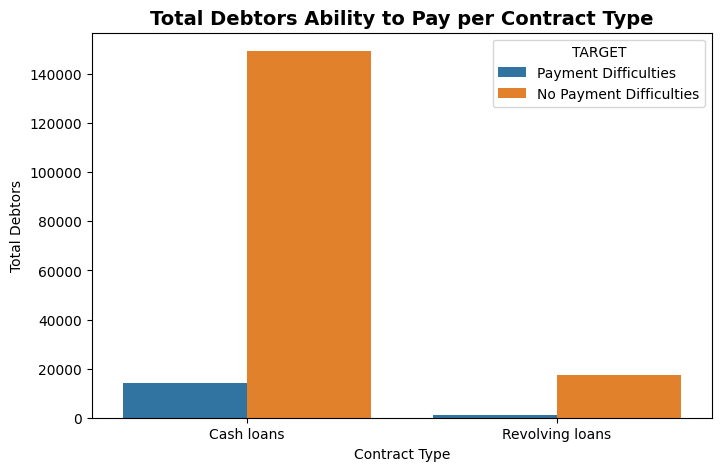

In [19]:
plt.figure(figsize = (8,5))
sns.countplot(x = 'NAME_CONTRACT_TYPE', data = app_train, hue = 'TARGET')
plt.title('Total Debtors Ability to Pay per Contract Type', fontweight='bold', fontsize=14)
plt.xlabel('Contract Type')
plt.ylabel('Total Debtors')
plt.legend(frameon=True, loc='upper right', title='TARGET')
plt.show()

In [20]:
# Total Debtors Ability to Pay per Contract Type
ct = app_train.groupby(by=['NAME_CONTRACT_TYPE','TARGET'], as_index=False)['SK_ID_CURR'].count()
ct.rename(columns={'SK_ID_CURR': 'TOTAL DEBTOR'}, inplace=True)
ct

,NAME_CONTRACT_TYPE,TARGET,TOTAL DEBTOR
0,Cash loans,No Payment Difficulties,149359
1,Cash loans,Payment Difficulties,14321
2,Revolving loans,No Payment Difficulties,17313
3,Revolving loans,Payment Difficulties,991


**Number of Debtors Ability to Pay per Total Income and Total Credit**

In [21]:
# Convert datatype
app_train['AMT_INCOME_TOTAL'] = app_train[['AMT_INCOME_TOTAL']].astype(int)
app_train['AMT_CREDIT'] = app_train[['AMT_CREDIT']].astype(int)

In [22]:
# Total income per Target
income = app_train.groupby('TARGET')['AMT_INCOME_TOTAL','AMT_CREDIT'].sum()
income.reset_index()

,TARGET,AMT_INCOME_TOTAL,AMT_CREDIT
0,No Payment Difficulties,29792454705,103863129184
1,Payment Difficulties,2691631826,8679666982


**Number of Debtors Ability to Pay per Education**

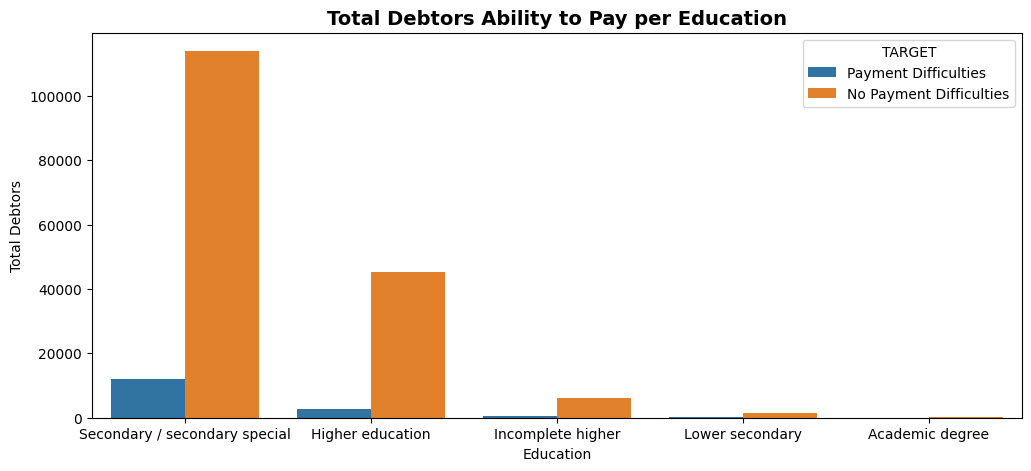

In [23]:
plt.figure(figsize = (12,5))
sns.countplot(x = 'NAME_EDUCATION_TYPE', data = app_train, hue = 'TARGET')
plt.title('Total Debtors Ability to Pay per Education', fontweight='bold', fontsize=14)
plt.xlabel('Education')
plt.ylabel('Total Debtors')
plt.legend(frameon=True, loc='upper right', title='TARGET')
plt.show()

In [24]:
# Total  per Target
ed = app_train.groupby(['TARGET','NAME_EDUCATION_TYPE']).count()[['SK_ID_CURR']]
ed.rename(columns={'SK_ID_CURR': 'TOTAL DEBTOR'}, inplace=True)
ed.sort_values('TARGET', ascending=False, inplace=True)
ed

TOTAL DEBTOR
TARGET                  NAME_EDUCATION_TYPE                        
Payment Difficulties    Academic degree                           2
                        Higher education                       2591
                        Incomplete higher                       554
                        Lower secondary                         224
                        Secondary / secondary special         11941
No Payment Difficulties Academic degree                          93
                        Higher education                      45274
                        Incomplete higher                      6039
                        Lower secondary                        1367
                        Secondary / secondary special        113899

**What debtor jobs can potentially be given a loan?**

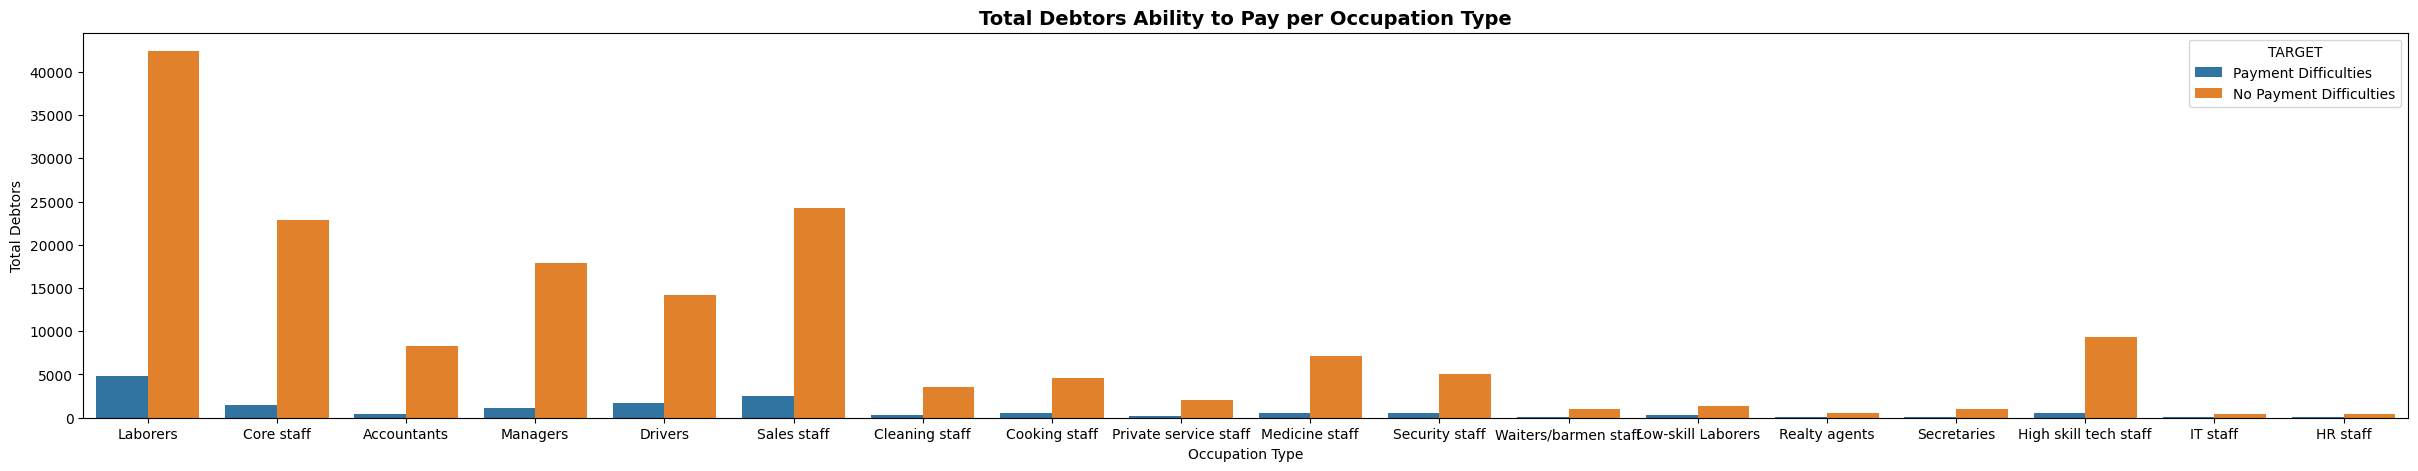

In [25]:
plt.figure(figsize = (30,5))
sns.countplot(x = 'OCCUPATION_TYPE', data = app_train, hue = 'TARGET')
plt.title('Total Debtors Ability to Pay per Occupation Type', fontweight='bold', fontsize=14)
plt.xlabel('Occupation Type')
plt.ylabel('Total Debtors')
plt.legend(frameon=True, loc='upper right', title='TARGET')
plt.show()

In [26]:
# Total Debtors Ability to Pay per Job Type
occ = app_train.groupby(by=['OCCUPATION_TYPE','TARGET'], as_index=False)['SK_ID_CURR'].count()
occ.rename(columns={'SK_ID_CURR': 'TOTAL DEBTOR'}, inplace=True)
occ

,OCCUPATION_TYPE,TARGET,TOTAL DEBTOR
0,Accountants,No Payment Difficulties,8314
1,Accountants,Payment Difficulties,412
2,Cleaning staff,No Payment Difficulties,3586
3,Cleaning staff,Payment Difficulties,365
4,Cooking staff,No Payment Difficulties,4563
5,Cooking staff,Payment Difficulties,519
6,Core staff,No Payment Difficulties,22814
7,Core staff,Payment Difficulties,1441
8,Drivers,No Payment Difficulties,14183
9,Drivers,Payment Difficulties,1716


In [27]:
# Total Debtors Ability to Pay per Job Type
occ1 = app_train.groupby(by=['OCCUPATION_TYPE'], as_index=False)['SK_ID_CURR'].count()
occ1.rename(columns={'SK_ID_CURR': 'TOTAL DEBTOR'}, inplace=True)
occ1.sort_values("TOTAL DEBTOR", ascending=False)

,OCCUPATION_TYPE,TOTAL DEBTOR
8,Laborers,47200
14,Sales staff,26780
3,Core staff,24255
10,Managers,19101
4,Drivers,15899
6,High skill tech staff,9978
0,Accountants,8726
11,Medicine staff,7681
16,Security staff,5684
2,Cooking staff,5082


#**EDA**

**Descriptive Statistic**

In [28]:
app_train.describe()

,SK_ID_CURR,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AGE_REGIS,AGE
count,181984.000000,181984.000000,1.819840e+05,1.819840e+05,181984.000000,1.819840e+05,181984.000000,181984,181984.000000,181984,181984.000000,181984.0,181984.000000,181984.000000,181984.000000,181984.000000,181984.000000,181984.000000,181984.000000,181984.000000,181984.000000,181984.000000,181984.000000,181984.000000,181984.000000,181984.000000,181984.000000,181984.000000,181984.000000,181984.000000,181984.000000,181984.000000,181984.000000,181984.000000,181984.000000,181984.000000,181984.000000,181984.000000,181984.000000,181984.000000,181984.000000,181984.000000,181984.000000,181984.000000,181984.000000,181984.00000,181984.000000,181984.000000,181984.000000,181984.000000,181984.000000,181984.000000,181984.000000,181984.000000,181984.000000
mean,278118.852894,0.509946,1.784997e+05,6.184214e+05,27902.343717,5.553523e+05,0.020698,-14862 days +15:14:42.117109248,-2443.820693,-4634 days +06:27:35.987339456,-2867.403431,1.0,0.999962,0.239878,0.997681,0.280299,0.063753,2.273513,2.049774,2.028376,12.207057,0.015853,0.059132,0.047773,0.086216,0.274975,0.215821,-999.415317,0.764265,0.000082,0.015732,0.008517,0.000143,0.099525,0.004094,0.000027,0.004094,0.000011,0.004484,0.003379,0.001462,0.012193,0.000352,0.010034,0.000747,0.00072,0.000346,0.006440,0.006929,0.033954,0.280146,0.260501,1.861708,27.542987,40.212409
std,102906.632571,0.768458,2.936007e+05,4.079583e+05,14532.865733,3.742471e+05,0.013580,3600 days 02:08:09.161583680,2372.062510,3246 days 05:00:01.832051392,1501.600930,0.0,0.006202,0.427010,0.048099,0.449147,0.244313,0.941398,0.505592,0.500097,3.285172,0.124907,0.235871,0.213287,0.280684,0.446503,0.411392,834.310428,0.424458,0.009078,0.124438,0.091895,0.011952,0.299367,0.063852,0.005242,0.063852,0.003315,0.066812,0.058035,0.038204,0.109749,0.018750,0.099666,0.027327,0.02682,0.018603,0.084208,0.110604,0.202836,0.937821,0.860743,1.823418,11.119793,9.862649
min,100002.000000,0.000000,2.655000e+04,4.500000e+04,1980.000000,4.050000e+04,0.000290,-25200 days +00:00:00,-17912.000000,-22928 days +00:00:00,-7197.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-4185.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000
25%,188828.500000,0.000000,1.125000e+05,2.844000e+05,17167.500000,2.475000e+05,0.010006,-17587 days +00:00:00,-3259.000000,-6945 days +00:00:00,-4212.000000,1.0,1.000000,0.000000,1.000000,0.000000,0.000000,2.000000,2.000000,2.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1614.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,19.000000,32.000000
50

array([[<Axes: title={'center': 'SK_ID_CURR'}>,
        <Axes: title={'center': 'CNT_CHILDREN'}>,
        <Axes: title={'center': 'AMT_INCOME_TOTAL'}>,
        <Axes: title={'center': 'AMT_CREDIT'}>,
        <Axes: title={'center': 'AMT_ANNUITY'}>,
        <Axes: title={'center': 'AMT_GOODS_PRICE'}>,
        <Axes: title={'center': 'REGION_POPULATION_RELATIVE'}>],
       [<Axes: title={'center': 'DAYS_EMPLOYED'}>,
        <Axes: title={'center': 'DAYS_ID_PUBLISH'}>,
        <Axes: title={'center': 'FLAG_MOBIL'}>,
        <Axes: title={'center': 'FLAG_EMP_PHONE'}>,
        <Axes: title={'center': 'FLAG_WORK_PHONE'}>,
        <Axes: title={'center': 'FLAG_CONT_MOBILE'}>,
        <Axes: title={'center': 'FLAG_PHONE'}>],
       [<Axes: title={'center': 'FLAG_EMAIL'}>,
        <Axes: title={'center': 'CNT_FAM_MEMBERS'}>,
        <Axes: title={'center': 'REGION_RATING_CLIENT'}>,
        <Axes: title={'center': 'REGION_RATING_CLIENT_W_CITY'}>,
        <Axes: title={'center': 'HOUR_APPR_PROCES

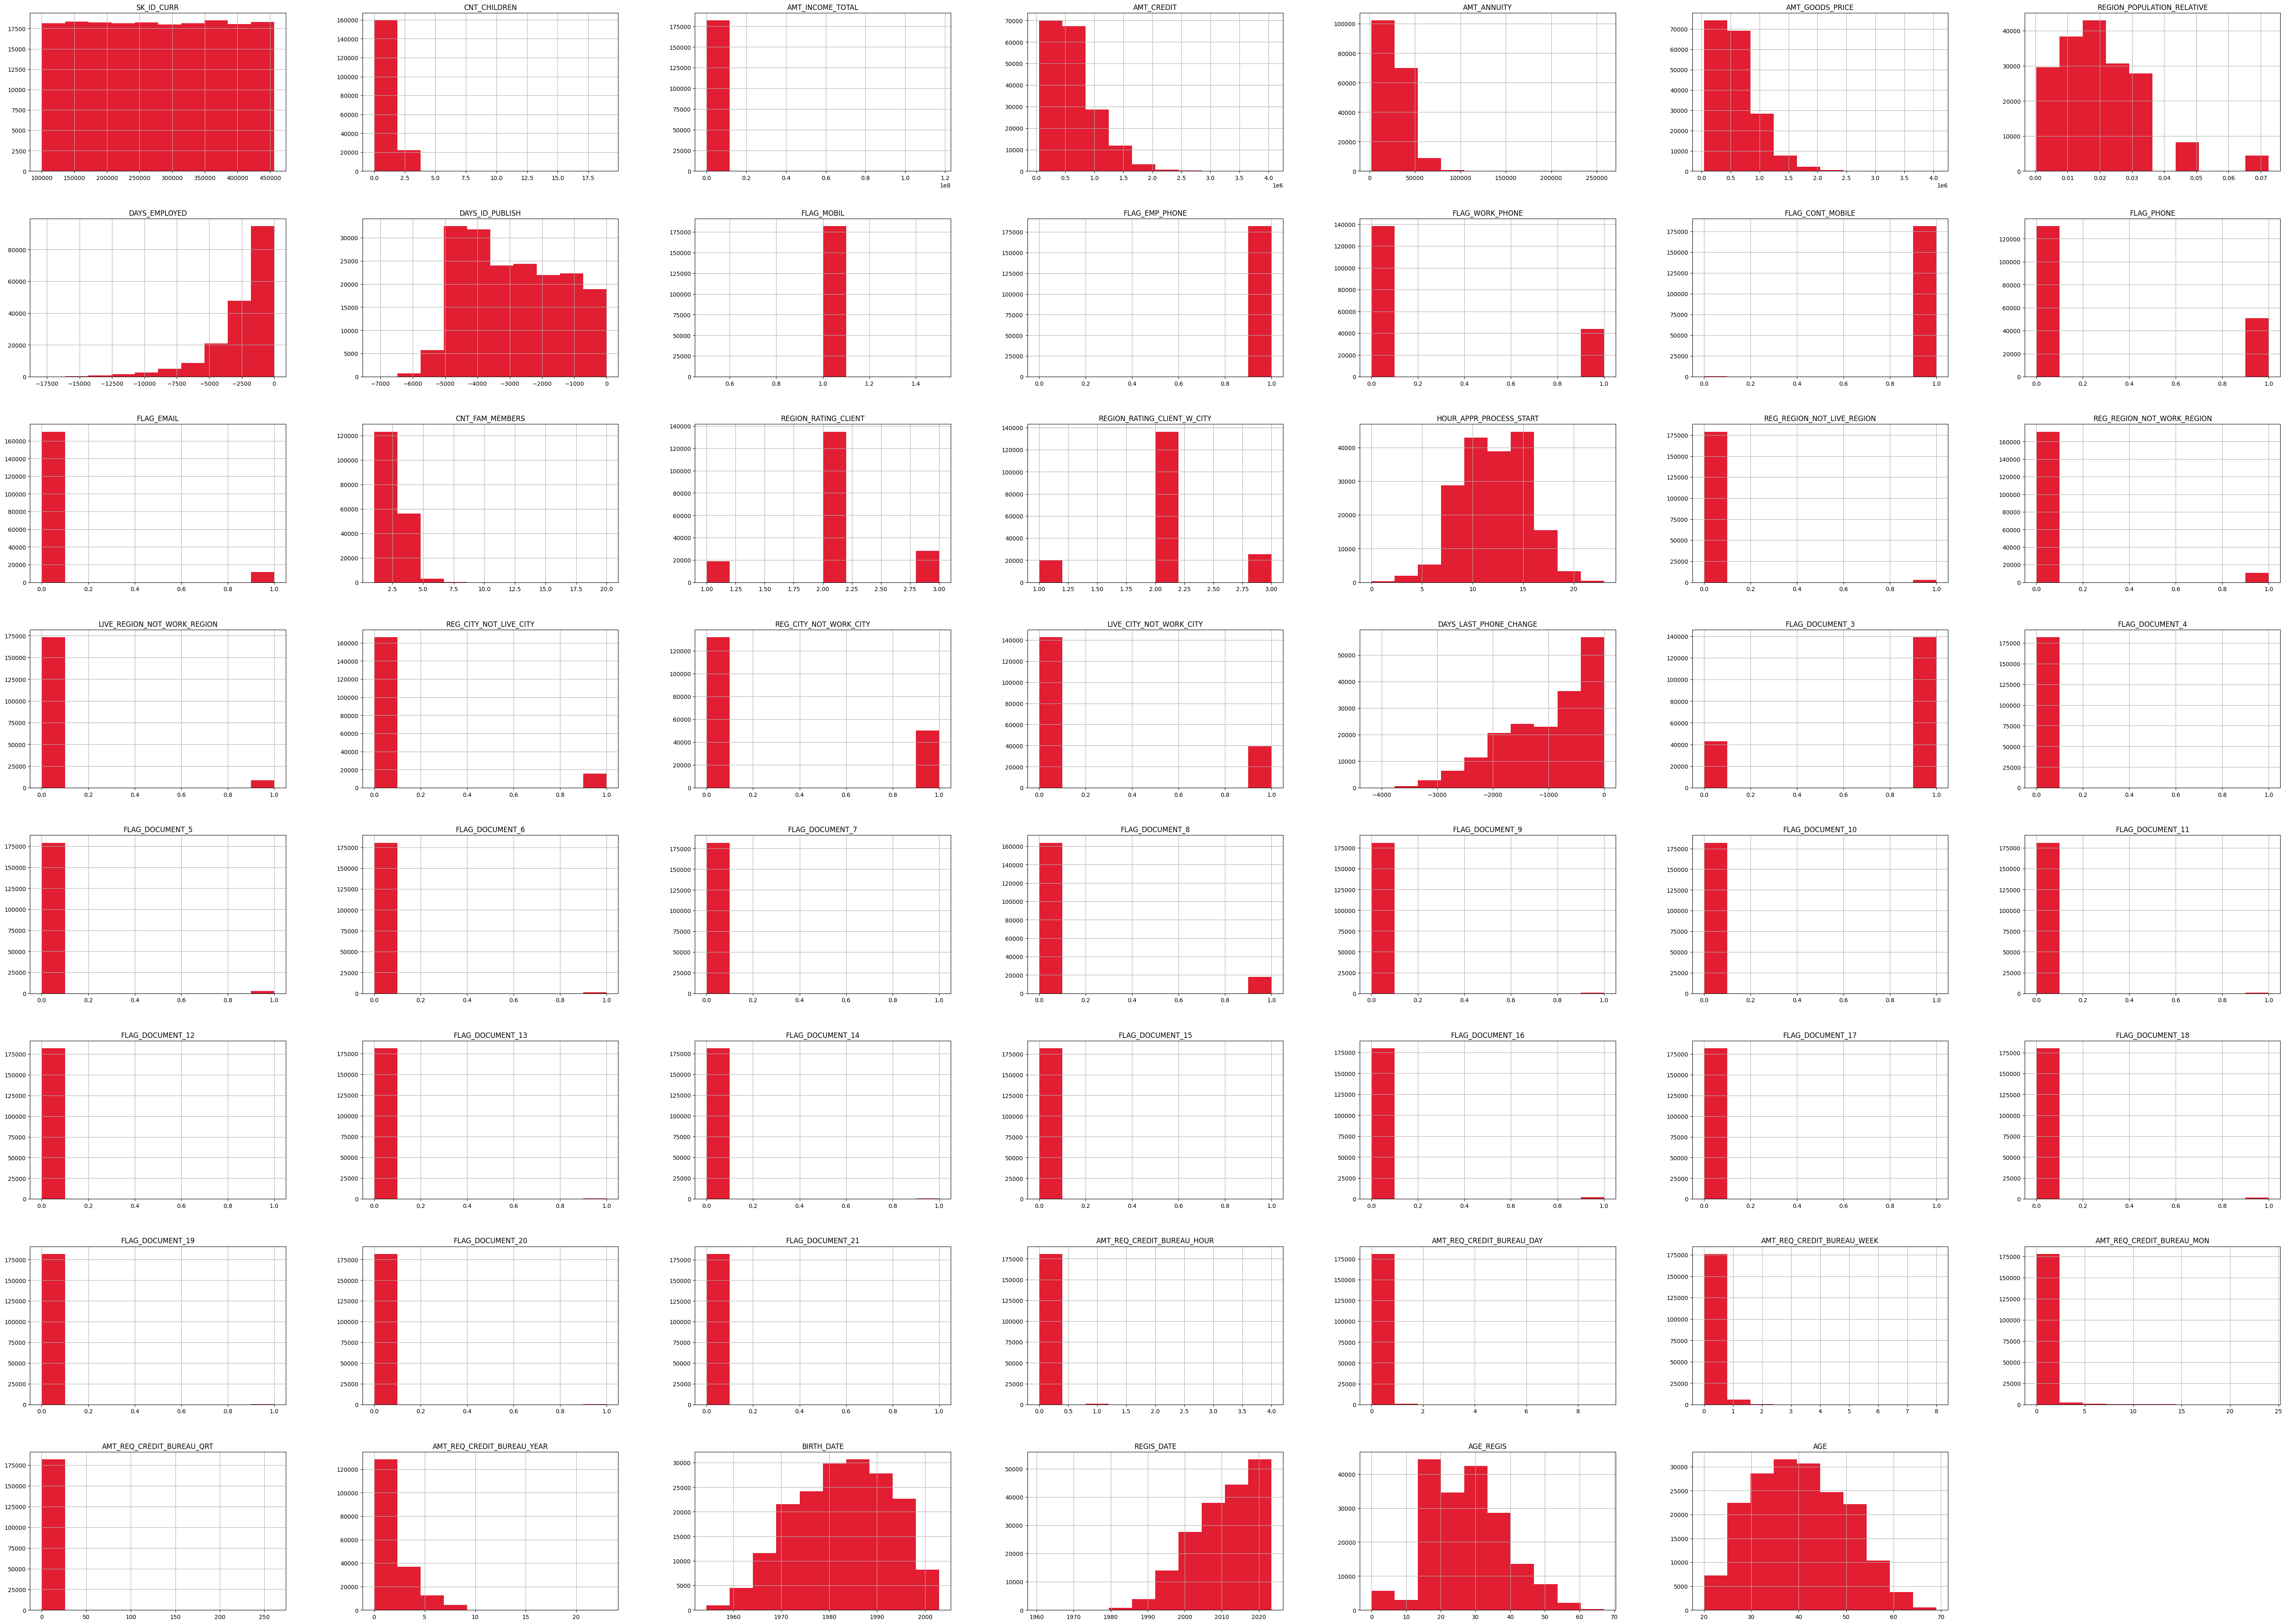

In [29]:
#Create histogram based on app_train
app_train.hist(figsize=(70,50),color='#E21E32')

**Remove Unnecessary Columns**

In [30]:
#Drop columns which are not necessary for further prediction
app_train = app_train.drop(columns=['SK_ID_CURR','DAYS_BIRTH','DAYS_EMPLOYED','DAYS_REGISTRATION',
                                    'DAYS_ID_PUBLISH','WEEKDAY_APPR_PROCESS_START','HOUR_APPR_PROCESS_START'],axis=1)
app_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 181984 entries, 0 to 307510
Data columns (total 63 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   TARGET                       181984 non-null  object        
 1   NAME_CONTRACT_TYPE           181984 non-null  object        
 2   CODE_GENDER                  181984 non-null  object        
 3   FLAG_OWN_CAR                 181984 non-null  object        
 4   FLAG_OWN_REALTY              181984 non-null  object        
 5   CNT_CHILDREN                 181984 non-null  int64         
 6   AMT_INCOME_TOTAL             181984 non-null  int64         
 7   AMT_CREDIT                   181984 non-null  int64         
 8   AMT_ANNUITY                  181984 non-null  float64       
 9   AMT_GOODS_PRICE              181984 non-null  float64       
 10  NAME_TYPE_SUITE              181984 non-null  object        
 11  NAME_INCOME_TYPE          

In [31]:
df = app_train.copy()

In [32]:
# The Number of Customers Based on Their Repayment Abilities
decode_map = {"No Payment Difficulties": 0, "Payment Difficulties": 1}
def decode_sentiment(label):
    return decode_map[str(label)]

df['TARGET'] = df['TARGET'].apply(lambda x: decode_sentiment(x))

# **Data Preprocessing**

**Separating between the feature and target columns**

In [33]:
X = df.drop('TARGET', axis = 1)
y = df['TARGET']

**Encoding**

In [34]:
for col in df.select_dtypes(include='object').columns.tolist():
    print(df[col].value_counts(normalize=True)*100)
    print('\n')

Cash loans         89.941973
Revolving loans    10.058027
Name: NAME_CONTRACT_TYPE, dtype: float64


F    61.672455
M    38.327545
Name: CODE_GENDER, dtype: float64


N    61.152079
Y    38.847921
Name: FLAG_OWN_CAR, dtype: float64


Y    67.833436
N    32.166564
Name: FLAG_OWN_REALTY, dtype: float64


Unaccompanied      81.745098
Family             12.614845
Spouse, partner     3.808577
Children            0.894584
Other_B             0.570929
Other_A             0.279695
Group of people     0.086271
Name: NAME_TYPE_SUITE, dtype: float64


Working                 63.176433
Commercial associate    27.997516
State servant            8.817259
Student                  0.005495
Businessman              0.001648
Pensioner                0.001099
Maternity leave          0.000549
Name: NAME_INCOME_TYPE, dtype: float64


Secondary / secondary special    69.148936
Higher education                 26.301763
Incomplete higher                 3.622846
Lower secondary                   0.874253
Ac

Looking at the percentage distribution of categorical data, if there is one value that dominates the feature it will be discarded

**Change categorical column to number using one-hot encoding**

In [35]:
#Get categorical columns only
df_cat = X.select_dtypes(include = ['object'])
df_cat.head()

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,ORGANIZATION_TYPE
0,Cash loans,M,N,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,Business Entity Type 3
1,Cash loans,F,N,N,Family,State servant,Higher education,Married,House / apartment,Core staff,School
2,Revolving loans,M,Y,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,Government
4,Cash loans,M,N,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Core staff,Religion
5,Cash loans,M,N,Y,"Spouse, partner",State servant,Secondary / secondary special,Married,House / apartment,Laborers,Other


In [36]:
#Get numerical columns only
df_num = X.select_dtypes(include = ['int64','float64'])
df_num.head()

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AGE_REGIS,AGE
0,0,202500,406597,24700.5,351000.0,0.018801,1,1,0,1,1,0,1.0,2,2,0,0,0,0,0,0,-1134.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,15,25
1,0,270000,1293502,35698.5,1129500.0,0.003541,1,1,0,1,1,0,2.0,1,1,0,0,0,0,0,0,-828.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,42,45
2,0,67500,135000,6750.0,135000.0,0.010032,1,1,1,1,1,0,1.0,2,2,0,0,0,0,0,0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,40,52
4,0,121500,513000,21865.5,513000.0,0.028663,1,1,0,1,0,0,1.0,2,2,0,0,0,0,1,1,-1106.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,42,54
5,0,99000,490495,27517.5,454500.0,0.035792,1,1,1,1,1,0,2.0,2,2,0,0,0,0,0,0,-2536.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0,1.0,32,46


In [37]:
#Get Dummies from Categorical Columns
df_cat = pd.get_dummies(df_cat, drop_first = True)

#Merge data categorical and numerical
all = pd.concat([df_num, df_cat], axis = 1)
all

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AGE_REGIS,AGE,NAME_CONTRACT_TYPE_Revolving loans,CODE_GENDER_M,FLAG_OWN_CAR_Y,FLAG_OWN_REALTY_Y,NAME_TYPE_SUITE_Family,NAME_TYPE_SUITE_Group of people,NAME_TYPE_SUITE_Other_A,NAME_TYPE_SUITE_Other_B,"NAME_TYPE_SUITE_Spouse, partner",NAME_TYPE_SUITE_Unaccompanied,NAME_INCOME_TYPE_Commercial associate,NAME_INCOME_TYPE_Maternity leave,NAME_INCOME_TYPE_Pensioner,NAME_INCOME_TYPE_State servant,NAME_INCOME_TYPE_Student,NAME_INCOME_TYPE_Working,NAME_EDUCATION_TYPE_Higher education,NAME_EDUCATION_TYPE_Incomplete higher,NAME_EDUCATION_TYPE_Lower secondary,NAME_EDUCATION_TYPE_Secondary / secondary special,NAME_FAMILY_STATUS_Married,NAME_FAMILY_STATUS_Separated,NAME_FAMILY_STATUS_Single / not married,NAME_FAMILY_STATUS_Widow,NAME_HOUSING_TYPE_House / apartment,NAME_HOUSING_TYPE_Municipal apartment,NAME_HOUSING_TYPE_Office apartment,NAME_HOUSING_TYPE_Rented apartment,NAME_HOUSING_TYPE_With parents,OCCUPATION_TYPE_Cleaning staff,OCCUPATION_TYPE_Cooking staff,OCCUPATION_TYPE_Core staff,OCCUPATION_TYPE_Drivers,OCCUPATION_TYPE_HR staff,OCCUPATION_TYPE_High skill tech staff,OCCUPATION_TYPE_IT staff,OCCUPATION_TYPE_Laborers,OCCUPATION_TYPE_Low-skill Laborers,OCCUPATION_TYPE_Managers,OCCUPATION_TYPE_Medicine staff,OCCUPATION_TYPE_Private service staff,OCCUPATION_TYPE_Realty agents,OCCUPATION_TYPE_Sales staff,OCCUPATION_TYPE_Secretaries,OCCUPATION_TYPE_Security staff,OCCUPATION_TYPE_Waiters/barmen staff,ORGANIZATION_TYPE_Agriculture,ORGANIZATION_TYPE_Bank,ORGANIZATION_TYPE_Business Entity Type 1,ORGANIZATION_TYPE_Business Entity Type 2,ORGANIZATION_TYPE_Business Entity Type 3,ORGANIZATION_TYPE_Cleaning,ORGANIZATION_TYPE_Construction,ORGANIZATION_TYPE_Culture,ORGANIZATION_TYPE_Electricity,ORGANIZATION_TYPE_Emergency,ORGANIZATION_TYPE_Government,ORGANIZATION_TYPE_Hotel,ORGANIZATION_TYPE_Housing,ORGANIZATION_TYPE_Industry: type 1,ORGANIZATION_TYPE_Industry: type 10,ORGANIZATION_TYPE_Industry: type 11,ORGANIZATION_TYPE_Industry: type 12,ORGANIZATION_TYPE_Industry: type 13,ORGANIZATION_TYPE_Industry: type 2,ORGANIZATION_TYPE_Industry: type 3,ORGANIZATION_TYPE_Industry: type 4,ORGANIZATION_TYPE_Industry: type 5,ORGANIZATION_TYPE_Industry: type 6,ORGANIZATION_TYPE_Industry: type 7,ORGANIZATION_TYPE_Industry: type 8,ORGANIZATION_TYPE_Industry: type 9,ORGANIZATION_TYPE_Insurance,ORGANIZATION_TYPE_Kindergarten,ORGANIZATION_TYPE_Legal Services,ORGANIZATION_TYPE_Medicine,ORGANIZATION_TYPE_Military,ORGANIZATION_TYPE_Mobile,ORGANIZATION_TYPE_Other,ORGANIZATION_TYPE_Police,ORGANIZATION_TYPE_Postal,ORGANIZATION_TYPE_Realtor,ORGANIZATION_TYPE_Religion,ORGANIZATION_TYPE_Restaurant,ORGANIZATION_TYPE_School,ORGANIZATION_TYPE_Security,ORGANIZATION_TYPE_Security Ministries,ORGANIZATION_TYPE_Self-employed,ORGANIZATION_TYPE_Services,ORGANIZATION_TYPE_Telecom,ORGANIZATION_TYPE_Trade: type 1,ORGANIZATION_TYPE_Trade: type 2,ORGANIZATION_TYPE_Trade: type 3,ORGANIZATION_TYPE_Trade: type 4,ORGANIZATION_TYPE_Trade: type 5,ORGANIZATION_TYPE_Trade: type 6,ORGANIZATION_TYPE_Trade: type 7,ORGANIZATION_TYPE_Transport: type 1,ORGANIZATION_TYPE_Transport: type 2,ORGANIZATION_TYPE_Transport: type 3,ORGANIZATI

**Check distribution data**

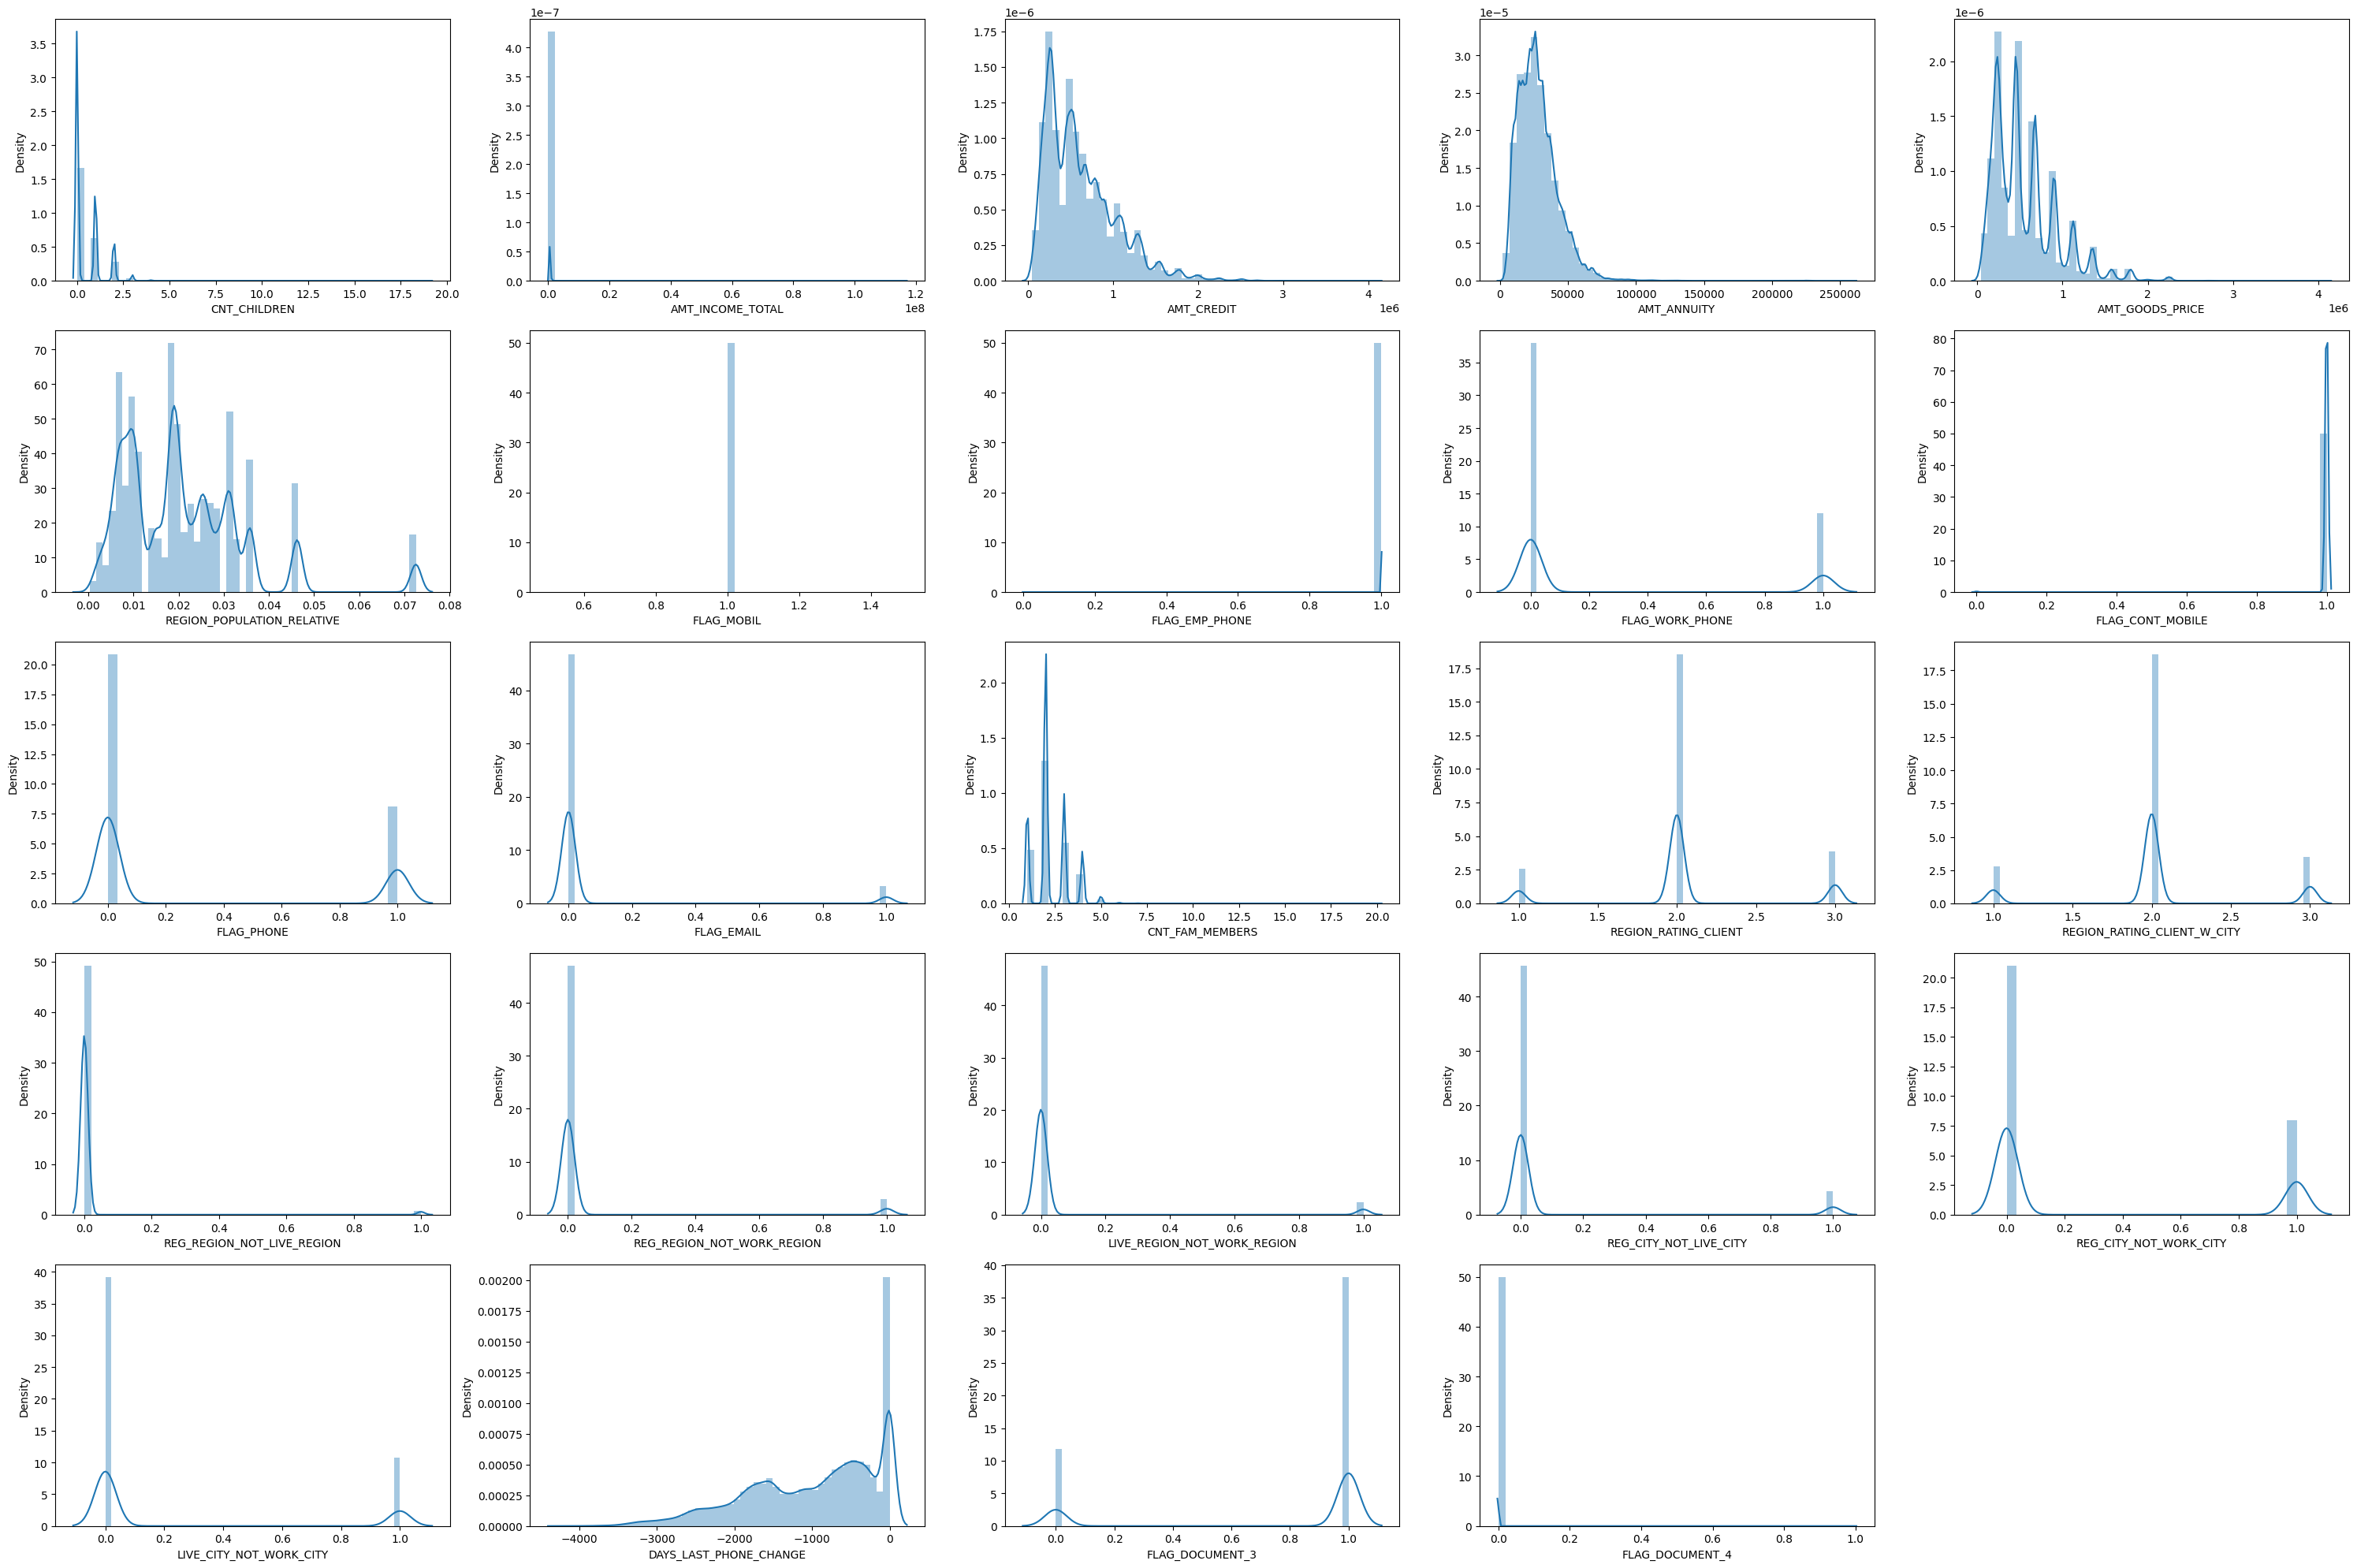

In [38]:
plt.figure(figsize = (30, 20))
plotnumber = 1

for col in all.columns:
    if plotnumber <= 24:
        ax = plt.subplot(5, 5, plotnumber)
        sns.distplot(all[col])
        plt.xlabel(col, fontsize = 10)
        
    plotnumber += 1
    
plt.tight_layout()
plt.show()

## **Handling Outliers**

**Detecting outliers that only consist numerical features**

In [39]:
int_features = all[["CNT_CHILDREN", "AMT_INCOME_TOTAL", "AMT_CREDIT", "AMT_ANNUITY",
                    "AMT_GOODS_PRICE", "REGION_POPULATION_RELATIVE"]]

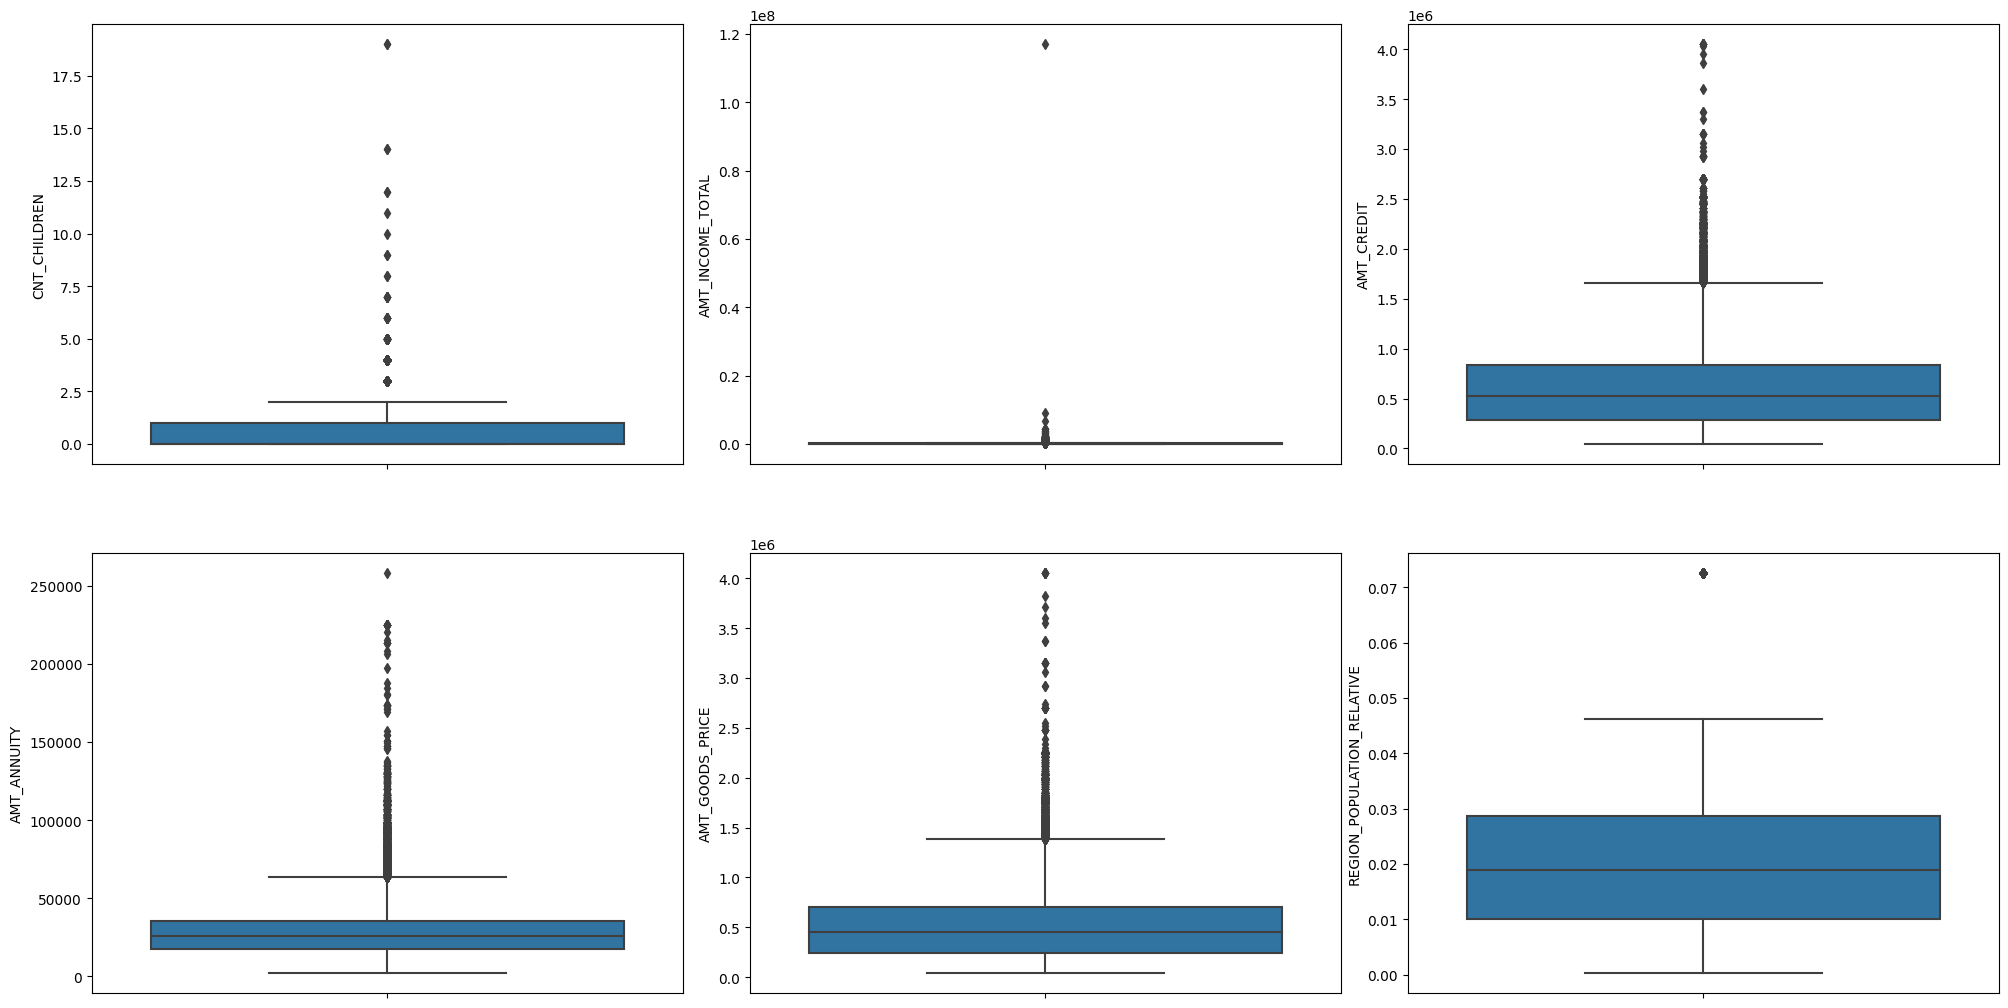

In [40]:
fig, axs = plt.subplots(ncols=3, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in int_features.items():
    sns.boxplot(y = k, data = int_features, ax=axs[index])
    index += 1
    if index == 6:
      break;
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

Outliers in the numerical features mentioned above will **not be removed** because there might be insights that can be drawn from these outliers.

## **Data Normalization**

In [41]:
#Scaling the numeric values in a data set (df_num)
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df_num)

In [42]:
df_scaled = pd.DataFrame(data = df_scaled, columns = df_num.columns)
df_scaled.head()

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AGE_REGIS,AGE
0,0.0,0.001504,0.090286,0.088736,0.077441,0.256321,0.0,1.0,0.0,1.0,1.0,0.0,0.000000,0.5,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.729032,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.043478,0.223881,0.102041
1,0.0,0.002081,0.311736,0.131689,0.271605,0.045016,0.0,1.0,0.0,1.0,1.0,0.0,0.052632,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.802151,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.626866,0.510204
2,0.0,0.000350,0.022472,0.018630,0.023569,0.134897,0.0,1.0,1.0,1.0,1.0,0.0,0.000000,0.5,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.805257,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.597015,0.653061
3,0.0,0.000812,0.116854,0.077664,0.117845,0.392880,0.0,1.0,0.0,1.0,0.0,0.0,0.000000,0.5,0.5,0.0,0.0,0.0,0.0,1.0,1.0,0.735723,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.626866,0.693878
4,0.0,0.000619,0.111235,0.099738,0.103255,0.491595,0.0,1.0,1.0,1.0,1.0,0.0,0.052632,0.5,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.394026,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.003831,0.043478,0.477612,0.530612


## **Split data into training set and test set**

In [43]:
#Split data into training set and test set
X_train, X_test, y_train, y_test = train_test_split(all, y, test_size = 0.2)

In [44]:
#Check data X_train
X_train

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AGE_REGIS,AGE,NAME_CONTRACT_TYPE_Revolving loans,CODE_GENDER_M,FLAG_OWN_CAR_Y,FLAG_OWN_REALTY_Y,NAME_TYPE_SUITE_Family,NAME_TYPE_SUITE_Group of people,NAME_TYPE_SUITE_Other_A,NAME_TYPE_SUITE_Other_B,"NAME_TYPE_SUITE_Spouse, partner",NAME_TYPE_SUITE_Unaccompanied,NAME_INCOME_TYPE_Commercial associate,NAME_INCOME_TYPE_Maternity leave,NAME_INCOME_TYPE_Pensioner,NAME_INCOME_TYPE_State servant,NAME_INCOME_TYPE_Student,NAME_INCOME_TYPE_Working,NAME_EDUCATION_TYPE_Higher education,NAME_EDUCATION_TYPE_Incomplete higher,NAME_EDUCATION_TYPE_Lower secondary,NAME_EDUCATION_TYPE_Secondary / secondary special,NAME_FAMILY_STATUS_Married,NAME_FAMILY_STATUS_Separated,NAME_FAMILY_STATUS_Single / not married,NAME_FAMILY_STATUS_Widow,NAME_HOUSING_TYPE_House / apartment,NAME_HOUSING_TYPE_Municipal apartment,NAME_HOUSING_TYPE_Office apartment,NAME_HOUSING_TYPE_Rented apartment,NAME_HOUSING_TYPE_With parents,OCCUPATION_TYPE_Cleaning staff,OCCUPATION_TYPE_Cooking staff,OCCUPATION_TYPE_Core staff,OCCUPATION_TYPE_Drivers,OCCUPATION_TYPE_HR staff,OCCUPATION_TYPE_High skill tech staff,OCCUPATION_TYPE_IT staff,OCCUPATION_TYPE_Laborers,OCCUPATION_TYPE_Low-skill Laborers,OCCUPATION_TYPE_Managers,OCCUPATION_TYPE_Medicine staff,OCCUPATION_TYPE_Private service staff,OCCUPATION_TYPE_Realty agents,OCCUPATION_TYPE_Sales staff,OCCUPATION_TYPE_Secretaries,OCCUPATION_TYPE_Security staff,OCCUPATION_TYPE_Waiters/barmen staff,ORGANIZATION_TYPE_Agriculture,ORGANIZATION_TYPE_Bank,ORGANIZATION_TYPE_Business Entity Type 1,ORGANIZATION_TYPE_Business Entity Type 2,ORGANIZATION_TYPE_Business Entity Type 3,ORGANIZATION_TYPE_Cleaning,ORGANIZATION_TYPE_Construction,ORGANIZATION_TYPE_Culture,ORGANIZATION_TYPE_Electricity,ORGANIZATION_TYPE_Emergency,ORGANIZATION_TYPE_Government,ORGANIZATION_TYPE_Hotel,ORGANIZATION_TYPE_Housing,ORGANIZATION_TYPE_Industry: type 1,ORGANIZATION_TYPE_Industry: type 10,ORGANIZATION_TYPE_Industry: type 11,ORGANIZATION_TYPE_Industry: type 12,ORGANIZATION_TYPE_Industry: type 13,ORGANIZATION_TYPE_Industry: type 2,ORGANIZATION_TYPE_Industry: type 3,ORGANIZATION_TYPE_Industry: type 4,ORGANIZATION_TYPE_Industry: type 5,ORGANIZATION_TYPE_Industry: type 6,ORGANIZATION_TYPE_Industry: type 7,ORGANIZATION_TYPE_Industry: type 8,ORGANIZATION_TYPE_Industry: type 9,ORGANIZATION_TYPE_Insurance,ORGANIZATION_TYPE_Kindergarten,ORGANIZATION_TYPE_Legal Services,ORGANIZATION_TYPE_Medicine,ORGANIZATION_TYPE_Military,ORGANIZATION_TYPE_Mobile,ORGANIZATION_TYPE_Other,ORGANIZATION_TYPE_Police,ORGANIZATION_TYPE_Postal,ORGANIZATION_TYPE_Realtor,ORGANIZATION_TYPE_Religion,ORGANIZATION_TYPE_Restaurant,ORGANIZATION_TYPE_School,ORGANIZATION_TYPE_Security,ORGANIZATION_TYPE_Security Ministries,ORGANIZATION_TYPE_Self-employed,ORGANIZATION_TYPE_Services,ORGANIZATION_TYPE_Telecom,ORGANIZATION_TYPE_Trade: type 1,ORGANIZATION_TYPE_Trade: type 2,ORGANIZATION_TYPE_Trade: type 3,ORGANIZATION_TYPE_Trade: type 4,ORGANIZATION_TYPE_Trade: type 5,ORGANIZATION_TYPE_Trade: type 6,ORGANIZATION_TYPE_Trade: type 7,ORGANIZATION_TYPE_Transport: type 1,ORGANIZATION_TYPE_Transport: type 2,ORGANIZATION_TYPE_Transport: type 3,ORGANIZATI

In [45]:
#Check data y_train
y_train

75740     0
187698    0
210461    0
65787     0
272365    0
         ..
22592     0
32377     0
295537    0
6267      0
267932    1
Name: TARGET, Length: 145587, dtype: int64

In [46]:
#Check data X_test
X_test

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AGE_REGIS,AGE,NAME_CONTRACT_TYPE_Revolving loans,CODE_GENDER_M,FLAG_OWN_CAR_Y,FLAG_OWN_REALTY_Y,NAME_TYPE_SUITE_Family,NAME_TYPE_SUITE_Group of people,NAME_TYPE_SUITE_Other_A,NAME_TYPE_SUITE_Other_B,"NAME_TYPE_SUITE_Spouse, partner",NAME_TYPE_SUITE_Unaccompanied,NAME_INCOME_TYPE_Commercial associate,NAME_INCOME_TYPE_Maternity leave,NAME_INCOME_TYPE_Pensioner,NAME_INCOME_TYPE_State servant,NAME_INCOME_TYPE_Student,NAME_INCOME_TYPE_Working,NAME_EDUCATION_TYPE_Higher education,NAME_EDUCATION_TYPE_Incomplete higher,NAME_EDUCATION_TYPE_Lower secondary,NAME_EDUCATION_TYPE_Secondary / secondary special,NAME_FAMILY_STATUS_Married,NAME_FAMILY_STATUS_Separated,NAME_FAMILY_STATUS_Single / not married,NAME_FAMILY_STATUS_Widow,NAME_HOUSING_TYPE_House / apartment,NAME_HOUSING_TYPE_Municipal apartment,NAME_HOUSING_TYPE_Office apartment,NAME_HOUSING_TYPE_Rented apartment,NAME_HOUSING_TYPE_With parents,OCCUPATION_TYPE_Cleaning staff,OCCUPATION_TYPE_Cooking staff,OCCUPATION_TYPE_Core staff,OCCUPATION_TYPE_Drivers,OCCUPATION_TYPE_HR staff,OCCUPATION_TYPE_High skill tech staff,OCCUPATION_TYPE_IT staff,OCCUPATION_TYPE_Laborers,OCCUPATION_TYPE_Low-skill Laborers,OCCUPATION_TYPE_Managers,OCCUPATION_TYPE_Medicine staff,OCCUPATION_TYPE_Private service staff,OCCUPATION_TYPE_Realty agents,OCCUPATION_TYPE_Sales staff,OCCUPATION_TYPE_Secretaries,OCCUPATION_TYPE_Security staff,OCCUPATION_TYPE_Waiters/barmen staff,ORGANIZATION_TYPE_Agriculture,ORGANIZATION_TYPE_Bank,ORGANIZATION_TYPE_Business Entity Type 1,ORGANIZATION_TYPE_Business Entity Type 2,ORGANIZATION_TYPE_Business Entity Type 3,ORGANIZATION_TYPE_Cleaning,ORGANIZATION_TYPE_Construction,ORGANIZATION_TYPE_Culture,ORGANIZATION_TYPE_Electricity,ORGANIZATION_TYPE_Emergency,ORGANIZATION_TYPE_Government,ORGANIZATION_TYPE_Hotel,ORGANIZATION_TYPE_Housing,ORGANIZATION_TYPE_Industry: type 1,ORGANIZATION_TYPE_Industry: type 10,ORGANIZATION_TYPE_Industry: type 11,ORGANIZATION_TYPE_Industry: type 12,ORGANIZATION_TYPE_Industry: type 13,ORGANIZATION_TYPE_Industry: type 2,ORGANIZATION_TYPE_Industry: type 3,ORGANIZATION_TYPE_Industry: type 4,ORGANIZATION_TYPE_Industry: type 5,ORGANIZATION_TYPE_Industry: type 6,ORGANIZATION_TYPE_Industry: type 7,ORGANIZATION_TYPE_Industry: type 8,ORGANIZATION_TYPE_Industry: type 9,ORGANIZATION_TYPE_Insurance,ORGANIZATION_TYPE_Kindergarten,ORGANIZATION_TYPE_Legal Services,ORGANIZATION_TYPE_Medicine,ORGANIZATION_TYPE_Military,ORGANIZATION_TYPE_Mobile,ORGANIZATION_TYPE_Other,ORGANIZATION_TYPE_Police,ORGANIZATION_TYPE_Postal,ORGANIZATION_TYPE_Realtor,ORGANIZATION_TYPE_Religion,ORGANIZATION_TYPE_Restaurant,ORGANIZATION_TYPE_School,ORGANIZATION_TYPE_Security,ORGANIZATION_TYPE_Security Ministries,ORGANIZATION_TYPE_Self-employed,ORGANIZATION_TYPE_Services,ORGANIZATION_TYPE_Telecom,ORGANIZATION_TYPE_Trade: type 1,ORGANIZATION_TYPE_Trade: type 2,ORGANIZATION_TYPE_Trade: type 3,ORGANIZATION_TYPE_Trade: type 4,ORGANIZATION_TYPE_Trade: type 5,ORGANIZATION_TYPE_Trade: type 6,ORGANIZATION_TYPE_Trade: type 7,ORGANIZATION_TYPE_Transport: type 1,ORGANIZATION_TYPE_Transport: type 2,ORGANIZATION_TYPE_Transport: type 3,ORGANIZATI

In [47]:
#Check data y_test
y_test

95572     0
197019    0
249519    0
12308     0
51346     0
         ..
121347    0
273978    0
188004    0
69226     0
38017     0
Name: TARGET, Length: 36397, dtype: int64

## **Handling Data Imbalance**

In [48]:
from imblearn.over_sampling import SMOTE 

OS_SMOTE = SMOTE()

X_sampling, y_sampling = OS_SMOTE.fit_resample(X_train,y_train)

   Labels  TARGET
0       0  133283
1       1  133283


Text(0.5, 1.0, 'Status after upsampling')

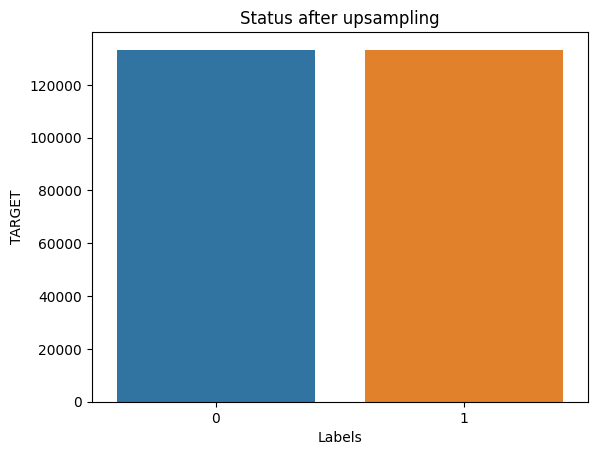

In [49]:
# Get the oversample value after balancing data
oversample = y_sampling.value_counts().reset_index()
oversample.columns = ['Labels','TARGET']
print(oversample)
sns.barplot(x='Labels',y='TARGET',data=oversample);
plt.title('Status after upsampling')

The data is balanced, so the analysis can be continued.

# **Modelling**

The model to be used is as follows:
1. Logistic Regression
2. Random Forest
3. Decision Tree Classifier
4. Support Vector Classifier (SVC)
5. KNeighbors Classifier

## **1. Logistic Regression**

In [50]:
m1 = LogisticRegression(random_state=0)
m1.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [51]:
#Get accuracy_score, confusion_matrix and classification_report
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

y_pred = m1.predict(X_test)
lr_train_acc = accuracy_score(y_train, m1.predict(X_train))
lr_test_acc = accuracy_score(y_test, y_pred)

print(f"Training accuracy of Logistic Regression is : {lr_train_acc}")
print(f"Test accuracy of Logistic Regression is : {lr_test_acc}")

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Training accuracy of Logistic Regression is : 0.9154869596873347
Test accuracy of Logistic Regression is : 0.9173558260296178
[[33389     0]
 [ 3008     0]]
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     33389
           1       0.00      0.00      0.00      3008

    accuracy                           0.92     36397
   macro avg       0.46      0.50      0.48     36397
weighted avg       0.84      0.92      0.88     36397



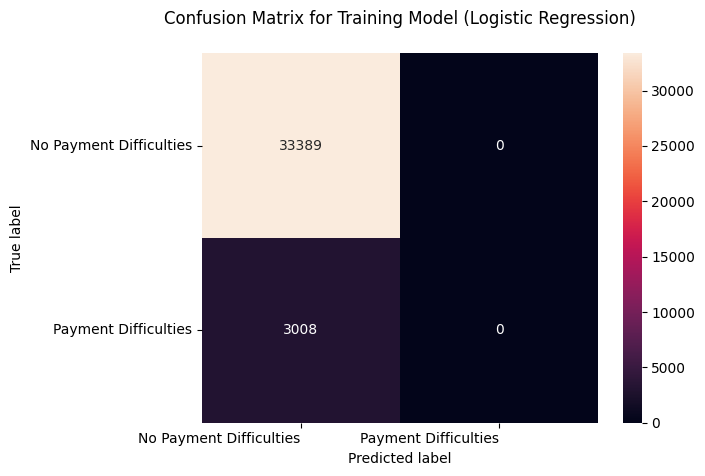

In [52]:
confusion_matrix = pd.DataFrame((confusion_matrix(y_test, y_pred)), ('No Payment Difficulties', 'Payment Difficulties'), ('No Payment Difficulties', 'Payment Difficulties'))

# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix, annot=True, annot_kws={'size': 10}, fmt='d')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=10)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=10)

plt.title('Confusion Matrix for Training Model (Logistic Regression)\n', fontsize=12)
plt.ylabel('True label', fontsize=10)
plt.xlabel('Predicted label', fontsize=10)
plt.show()

## **2. Random Forest**

In [53]:
m2 = RandomForestClassifier(random_state=0)
m2.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [54]:
#Get accuracy_score, confusion_matrix and classification_report
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

y_pred = m2.predict(X_test)
rfc_train = accuracy_score(y_train, m2.predict(X_train))
rfc_test = accuracy_score(y_test, y_pred)

print(f"Training accuracy of Random Forest Classifier is : {rfc_train}")
print(f"Test accuracy of Random Forest Classifier is : {rfc_test}")

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Training accuracy of Random Forest Classifier is : 0.9999381812936594
Test accuracy of Random Forest Classifier is : 0.9174382504052532
[[33389     0]
 [ 3005     3]]
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     33389
           1       1.00      0.00      0.00      3008

    accuracy                           0.92     36397
   macro avg       0.96      0.50      0.48     36397
weighted avg       0.92      0.92      0.88     36397



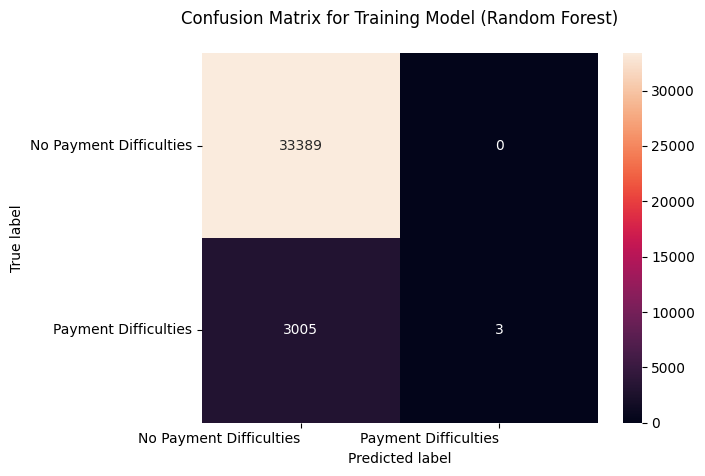

In [55]:
confusion_matrix = pd.DataFrame((confusion_matrix(y_test, y_pred)), ('No Payment Difficulties', 'Payment Difficulties'), ('No Payment Difficulties', 'Payment Difficulties'))

# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix, annot=True, annot_kws={'size': 10}, fmt='d')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=10)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=10)

plt.title('Confusion Matrix for Training Model (Random Forest)\n', fontsize=12)
plt.ylabel('True label', fontsize=10)
plt.xlabel('Predicted label', fontsize=10)
plt.show()

## **3. Decision Tree Classifier**

In [56]:
m3 = DecisionTreeClassifier(random_state=0)
m3.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [57]:
#Get accuracy_score, confusion_matrix and classification_report
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

y_pred = m3.predict(X_test)
dtc_train = accuracy_score(y_train, m3.predict(X_train))
dtc_test = accuracy_score(y_test, y_pred)

print(f"Training accuracy of Decision Tree Classifier is : {dtc_train}")
print(f"Test accuracy of Decision Tree Classifier is : {dtc_test}")

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Training accuracy of Decision Tree Classifier is : 1.0
Test accuracy of Decision Tree Classifier is : 0.8410583289831579
[[30244  3145]
 [ 2640   368]]
              precision    recall  f1-score   support

           0       0.92      0.91      0.91     33389
           1       0.10      0.12      0.11      3008

    accuracy                           0.84     36397
   macro avg       0.51      0.51      0.51     36397
weighted avg       0.85      0.84      0.85     36397



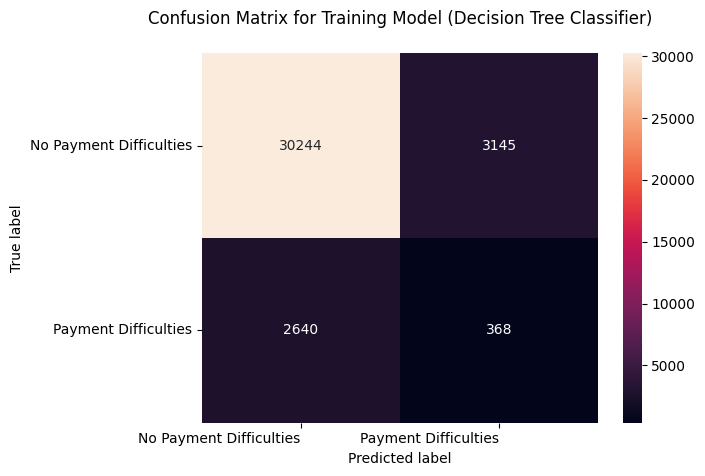

In [58]:
confusion_matrix = pd.DataFrame((confusion_matrix(y_test, y_pred)), ('No Payment Difficulties', 'Payment Difficulties'), ('No Payment Difficulties', 'Payment Difficulties'))

# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix, annot=True, annot_kws={'size': 10}, fmt='d')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=10)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=10)

plt.title('Confusion Matrix for Training Model (Decision Tree Classifier)\n', fontsize=12)
plt.ylabel('True label', fontsize=10)
plt.xlabel('Predicted label', fontsize=10)
plt.show()

## **4. Support Vector Classifier (SVC)**

In [ ]:
from sklearn.svm import SVC

m4 = SVC(probability=True, random_state=0)
m4.fit(X_train, y_train)

In [ ]:
#Get accuracy_score, confusion_matrix and classification_report
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

y_pred = m4.predict(X_test)
svc_trainc = accuracy_score(y_train, m4.predict(X_train))
svc_testc = accuracy_score(y_test, y_pred)

print(f"Training accuracy of SVC is : {svc_trainc}")
print(f"Test accuracy of SVC is : {svc_testc}")

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

In [ ]:
confusion_matrix = pd.DataFrame((confusion_matrix(y_test, y_pred)), ('No Payment Difficulties', 'Payment Difficulties'), ('No Payment Difficulties', 'Payment Difficulties'))

# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix, annot=True, annot_kws={'size': 10}, fmt='d')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=10)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=10)

plt.title('Confusion Matrix for Training Model (SVC)\n', fontsize=12)
plt.ylabel('True label', fontsize=10)
plt.xlabel('Predicted label', fontsize=10)
plt.show()

## **5. KNeighbors Classifier**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

m5 = KNeighborsClassifier(random_state=0)
m5.fit(X_train, y_train)

In [ ]:
#Get accuracy_score, confusion_matrix and classification_report
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

y_pred = m5.predict(X_test)
knc_train = accuracy_score(y_train, m5.predict(X_train))
knc_test = accuracy_score(y_test, y_pred)

print(f"Training accuracy of KNeighbors Classifier is : {knc_train}")
print(f"Test accuracy of KNeighbors Classifier is : {knc_test}")

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

In [ ]:
confusion_matrix = pd.DataFrame((confusion_matrix(y_test, y_pred)), ('No Payment Difficulties', 'Payment Difficulties'), ('No Payment Difficulties', 'Payment Difficulties'))

# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix, annot=True, annot_kws={'size': 10}, fmt='d')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=10)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=10)

plt.title('Confusion Matrix for Training Model (KNeighbors Classifier)\n', fontsize=12)
plt.ylabel('True label', fontsize=10)
plt.xlabel('Predicted label', fontsize=10)
plt.show()

## **Campare each model**

In [59]:
models = pd.DataFrame({
    'Model' : ['Logistic Regression','Random Forest','Decision Tree Classifier'],
    'Score' : [lr_test_acc, rfc_test, dtc_test]})

models.sort_values(by = 'Score', ascending = False)

,Model,Score
1,Random Forest,0.917438
0,Logistic Regression,0.917356
2,Decision Tree Classifier,0.841058


Best Model : **Random Forest** <br>
Classifier Accuracy : 0.9162293595626013 **(91,7 %)**